<a href="https://colab.research.google.com/github/Zubaer-Ahmad/Data-Analysis-Project_1/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Project1/project 1 data.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


**Cheaking Null Value**

In [4]:
data.isnull().any().sum()
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

**Deleting Null Value**

In [6]:
data.dropna(inplace=True)
data.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

**Cheaking Duplicated Value**

In [7]:
data.duplicated().any().sum()


1

 **Deleting Duplicate**

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().any().sum()

0

**Showing Data Types**

In [10]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

**1.Total Revenue Calculation: What is the total revenue generated from the sales
in this dataset?**

In [12]:
# Calculate total revenue
total_revenue = (data['Quantity'] * data['UnitPrice']).sum()

print("Total Revenue:", total_revenue)

Total Revenue: 9726006.954


**2. Top Customers: Who are the top 10 customers in terms of total revenue?**

In [15]:
# Calculate total revenue for each customer
customer_revenue = data.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Sort customers by total revenue in descending order and select top 10
top_10_customers = customer_revenue.sort_values(ascending=False).head(10)

print("Top 10 Customers by Total Revenue:")
print(top_10_customers)

Top 10 Customers by Total Revenue:
CustomerID
15287    1447972.77
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
12415     123725.45
14156     113214.59
17511      88125.38
16684      65892.08
13694      62690.54
dtype: float64


**3. Sales by Country: What are the total sales per country?**

In [16]:
# Calculate total sales per country
sales_by_country = data.groupby('Country').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

print("Total Sales per Country:")
print(sales_by_country)

Total Sales per Country:
Country
Australia                137009.770
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20076.390
Cyprus                    12858.760
Czech Republic              707.720
Denmark                   18768.140
EIRE                     262993.380
European Community         1291.750
Finland                   22326.740
France                   197317.110
Germany                  221509.470
Greece                     4710.520
Hong Kong                  9908.240
Iceland                    4310.000
Israel                     7901.970
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213

**4. Monthly Sales Trends: How do sales trends vary on a monthly basis?**

In [20]:

# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Calculate total sales per month
monthly_sales = data.groupby('YearMonth').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Convert 'YearMonth' back to a string in 'YYYY-MonthName' format for readability
monthly_sales.index = monthly_sales.index.strftime('%Y-%B')

print("Monthly Sales Trends:")
print(monthly_sales)

Monthly Sales Trends:
YearMonth
2010-December      746723.610
2011-January       558448.560
2011-February      497026.410
2011-March         682013.980
2011-April         492367.841
2011-May           722094.100
2011-June          689977.230
2011-July          680156.991
2011-August        681386.460
2011-September    1017596.682
2011-October      1069368.230
2011-November     1456145.800
2011-December      432701.060
dtype: float64


**5. Most Popular Products: What are the top 10 best-selling products by quantity?**

In [22]:
# Group by 'StockCode' and 'Description' and sum the 'Quantity'
product_sales = data.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort the products by total quantity in descending order and select top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Rename the columns for better readability
top_10_products.columns = ['StockCode', 'Description', 'Quantity']

print("Top 10 Best-Selling Products by Quantity:")
print(top_10_products)

Top 10 Best-Selling Products by Quantity:
     StockCode                         Description  Quantity
3617     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
4197    85099B             JUMBO BAG RED RETROSPOT     47260
1333     22197                      POPCORN HOLDER     36322
3956     84879       ASSORTED COLOUR BIRD ORNAMENT     36282
531      21212     PACK OF 72 RETROSPOT CAKE CASES     36016
4223    85123A  WHITE HANGING HEART T-LIGHT HOLDER     35006
2344     23084                  RABBIT NIGHT LIGHT     30631
1630     22492             MINI PAINT SET VINTAGE      26437
1775     22616          PACK OF 12 LONDON TISSUES      26299
1122     21977  PACK OF 60 PINK PAISLEY CAKE CASES     24719


**6. Average Order Value: What is the average order value for each customer?**

In [23]:
# Calculate the total revenue for each row
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Calculate the total revenue for each invoice
invoice_revenue = data.groupby('InvoiceNo')['Revenue'].sum().reset_index()

# Calculate the total revenue for each customer
customer_revenue = data.groupby('CustomerID')['Revenue'].sum().reset_index()

# Count the number of unique invoices for each customer
customer_invoices = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Merge the total revenue and invoice count dataframes
customer_data = pd.merge(customer_revenue, customer_invoices, on='CustomerID')

# Calculate the average order value
customer_data['AverageOrderValue'] = customer_data['Revenue'] / customer_data['InvoiceNo']

# Rename columns for better readability
customer_data.columns = ['CustomerID', 'TotalRevenue', 'InvoiceCount', 'AverageOrderValue']

print("Average Order Value for Each Customer:")
print(customer_data)

Average Order Value for Each Customer:
      CustomerID  TotalRevenue  InvoiceCount  AverageOrderValue
0          12346          0.00             2           0.000000
1          12347       4310.00             7         615.714286
2          12348       1797.24             4         449.310000
3          12349       1757.55             1        1757.550000
4          12350        334.40             1         334.400000
...          ...           ...           ...                ...
4367       18280        180.60             1         180.600000
4368       18281         80.82             1          80.820000
4369       18282        176.60             3          58.866667
4370       18283       2045.53            16         127.845625
4371       18287       1837.28             3         612.426667

[4372 rows x 4 columns]


**7. Frequent Buyers: Which customers made the most frequent purchases?**

In [24]:
# Count the number of unique invoices for each customer
customer_invoices = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Sort the customers by the number of unique invoices in descending order
frequent_buyers = customer_invoices.sort_values(by='InvoiceNo', ascending=False).head(10)

# Rename columns for better readability
frequent_buyers.columns = ['CustomerID', 'PurchaseCount']

print("Top 10 Frequent Buyers:")
print(frequent_buyers)

Top 10 Frequent Buyers:
      CustomerID  PurchaseCount
2175       15287           2259
1895       14911            248
330        12748            224
4042       17841            169
1674       14606            128
2192       15311            118
568        13089            118
487        12971             89
1615       14527             86
803        13408             81


**8. Sales on Weekdays vs. Weekends: How do sales compare between weekdays
and weekends?**

In [26]:
# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract the day of the week from 'InvoiceDate' (0=Monday, 6=Sunday)
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek

# Create a new column to indicate whether it's a weekday or a weekend
data['WeekdayOrWeekend'] = data['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate total revenue for each row
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Calculate total sales for weekdays and weekends
sales_comparison = data.groupby('WeekdayOrWeekend')['Revenue'].sum().reset_index()

print("Sales Comparison between Weekdays and Weekends:")
print(sales_comparison)

Sales Comparison between Weekdays and Weekends:
  WeekdayOrWeekend      Revenue
0          Weekday  8927347.493
1          Weekend   798659.461


**9. Repeat Purchase Rate: What percentage of customers made repeat
purchases?**

In [33]:
# Count the total number of unique customers
total_customers = data['CustomerID'].nunique()

# Count the number of customers who made more than one purchase
repeat_customers = data.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers_count = repeat_customers[repeat_customers > 1].count()

# Calculate the repeat purchase rate
repeat_purchase_rate = (repeat_customers_count / total_customers) * 100

print("Repeat Purchase Rate: {:.2f}%".format(repeat_purchase_rate))

Repeat Purchase Rate: 69.97%


**10.High-Value Orders: What are the highest-value orders in the dataset?**

In [34]:
# Calculate the total revenue for each invoice
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
invoice_revenue = data.groupby('InvoiceNo')['TotalRevenue'].sum().reset_index()

# Sort the invoices based on total revenue in descending order
highest_value_orders = invoice_revenue.sort_values(by='TotalRevenue', ascending=False)

print("Highest-Value Orders:")
print(highest_value_orders.head())

Highest-Value Orders:
      InvoiceNo  TotalRevenue
20571    581483     168469.60
2142     541431      77183.60
17403    574941      52940.94
18083    576365      50653.91
8876     556444      38970.00


**Visualization Questions:**




**1. Revenue Over Time: Create a line chart showing total monthly revenue.**

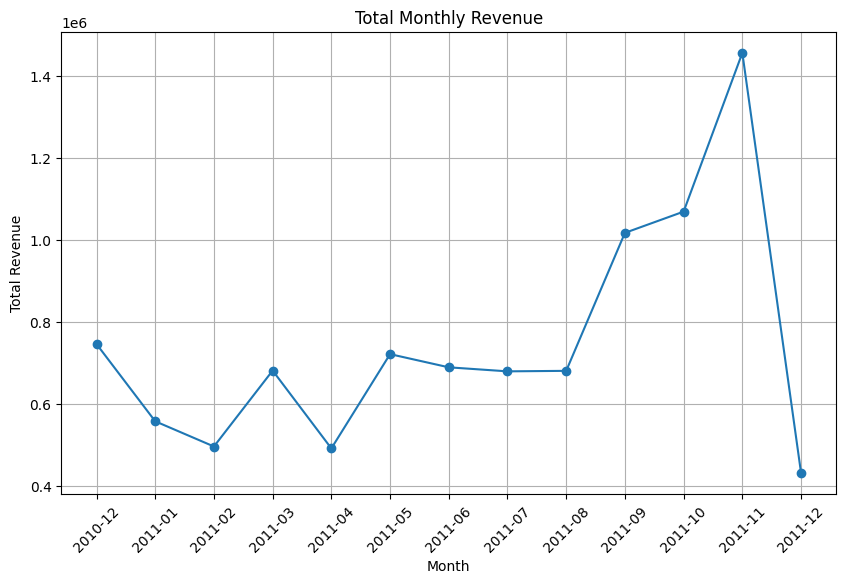

In [36]:
# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract year-month from 'InvoiceDate'
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Calculate total revenue per month
monthly_revenue = data.groupby('YearMonth').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o', linestyle='-')
plt.title('Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**2. Sales Distribution by Country: Create a bar chart showing sales distribution
across different countries.**

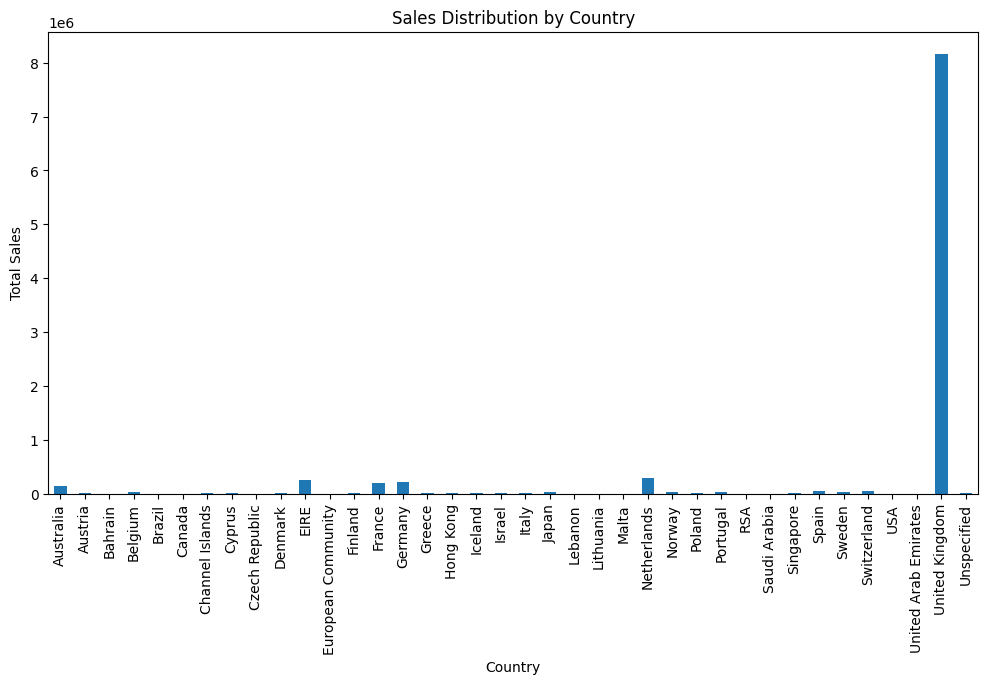

In [39]:
# Calculate total sales per country
sales_by_country = data.groupby('Country')[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Plot the bar chart
plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar')
plt.title('Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

**3. Top Products by Sales: Create a bar chart for the top 10 best-selling products.**

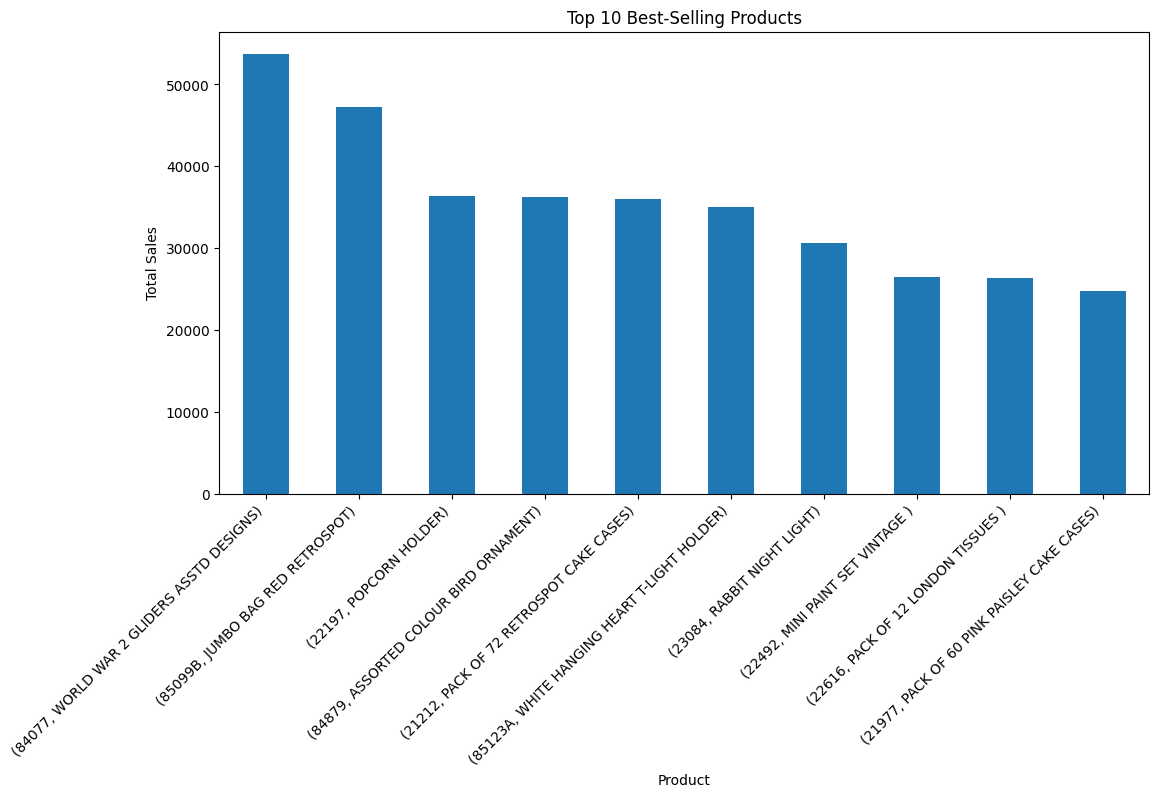

In [40]:
# Calculate total sales for each product
product_sales = data.groupby(['StockCode', 'Description'])['Quantity'].sum()

# Sort products by total sales in descending order and select top 10
top_10_products = product_sales.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

**4. Customer Segmentation: Create a scatter plot showing customer segmentation
based on their total revenue and frequency of purchases.**

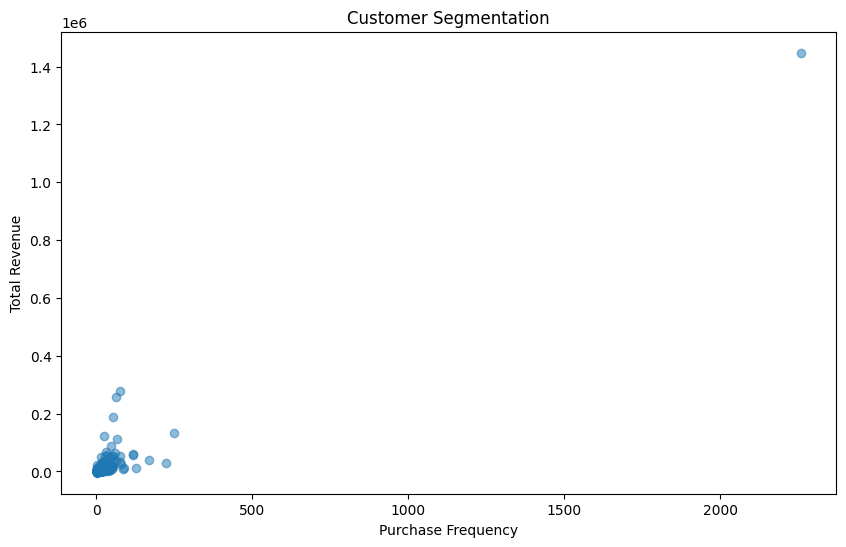

In [44]:
# Calculate total revenue for each customer
customer_revenue = data.groupby('CustomerID')[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Calculate frequency of purchases for each customer
purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a DataFrame for customer segmentation
customer_segmentation = pd.DataFrame({'TotalRevenue': customer_revenue, 'PurchaseFrequency': purchase_frequency})

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation['PurchaseFrequency'], customer_segmentation['TotalRevenue'], alpha=0.5)
plt.title('Customer Segmentation')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Revenue')
plt.show()

**5. Sales Heatmap: Create a heatmap showing sales by day of the week and time
of day.**

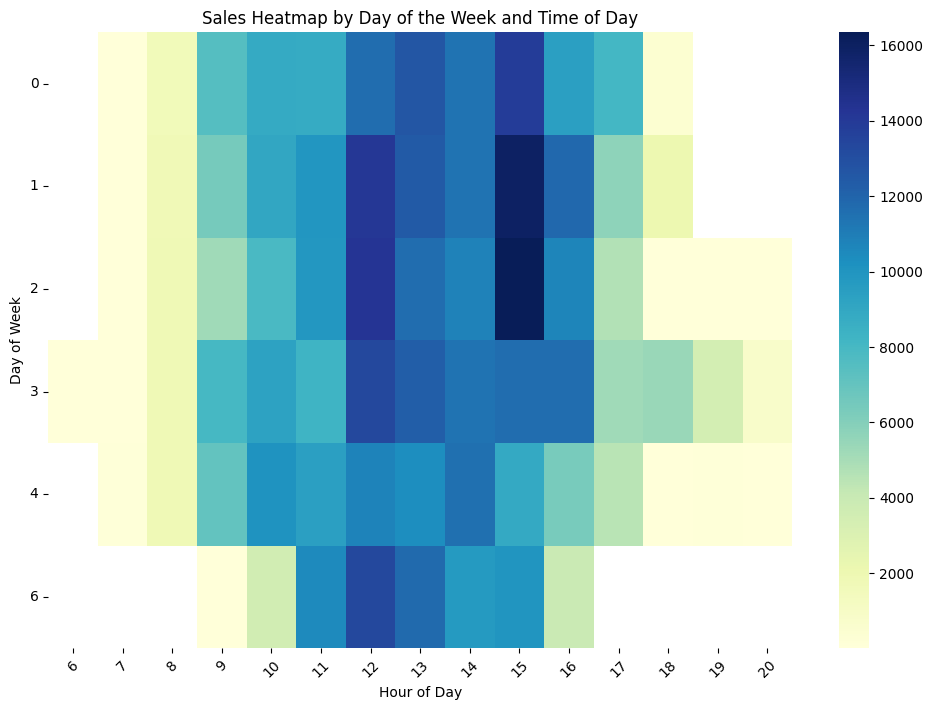

In [45]:
# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract day of the week and hour of the day from 'InvoiceDate'
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['HourOfDay'] = data['InvoiceDate'].dt.hour

# Group by day of the week and hour of the day and calculate total sales
sales_heatmap_data = data.groupby(['DayOfWeek', 'HourOfDay']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap_data, cmap='YlGnBu')
plt.title('Sales Heatmap by Day of the Week and Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**6. Product Sales Trends: Create a line chart showing the sales trends of the top 5
products over time.**

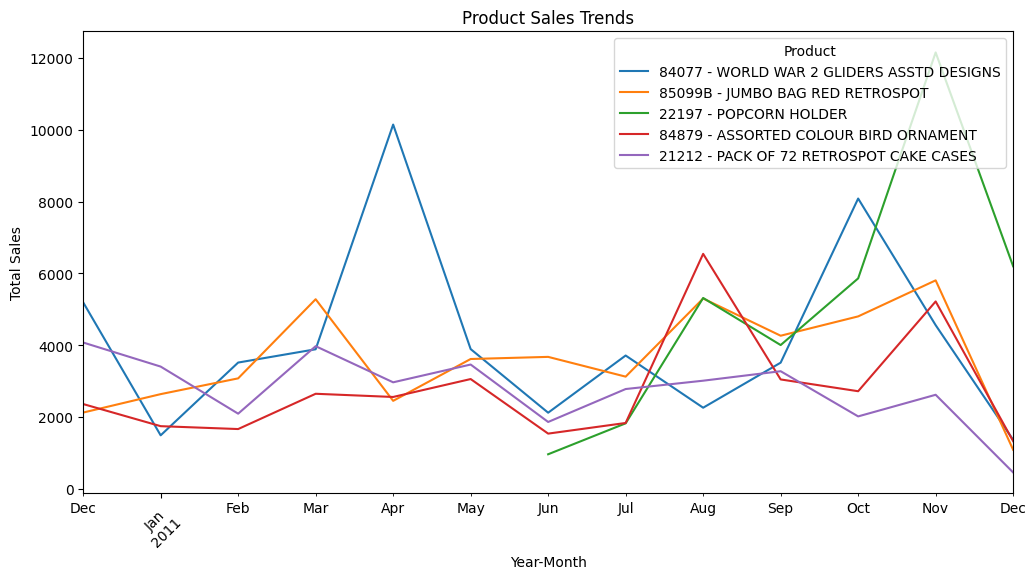

In [49]:
# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate total sales for each product over time
product_sales_trends = data.groupby(['StockCode', 'Description', pd.Grouper(key='InvoiceDate', freq='M')])['Quantity'].sum().unstack(level=[0, 1])

# Select the top 5 best-selling products
top_5_products = product_sales_trends.sum().sort_values(ascending=False).head(5).index

# Plot the line chart for the top 5 products
plt.figure(figsize=(12, 6))
for product_code, product_description in top_5_products:
    product_sales_trends[product_code, product_description].plot(label=f'{product_code} - {product_description}')

plt.title('Product Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()

**7. Revenue Distribution: Create a histogram showing the distribution of order
values.**

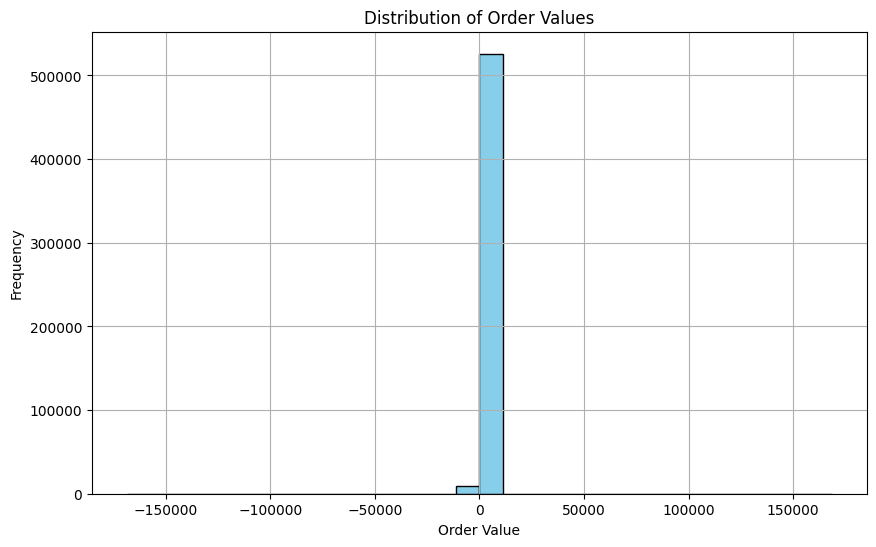

In [50]:
# Calculate total revenue for each order
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['TotalRevenue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**8. Top Customers: Create a bar chart for the top 10 customers by total revenue.**

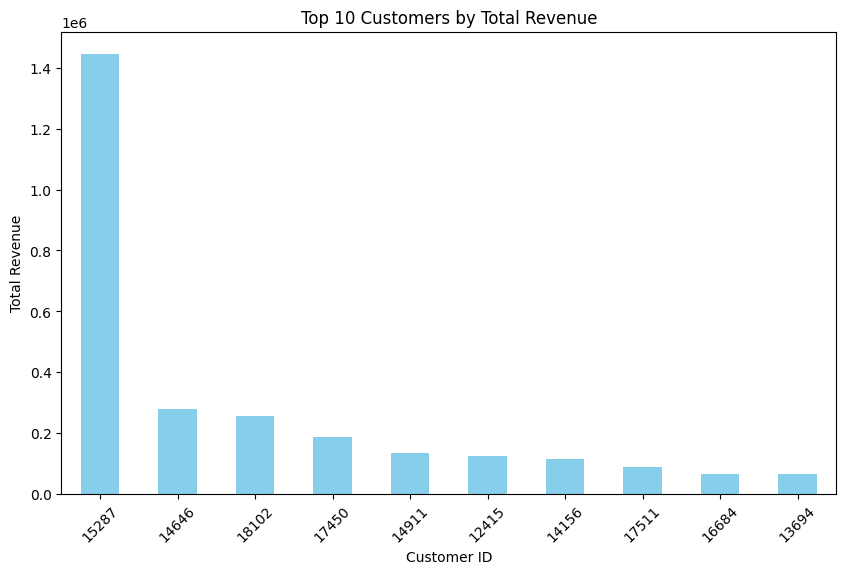

In [53]:
# Calculate total revenue for each customer
customer_revenue = data.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Select the top 10 customers with the highest total revenue
top_10_customers = customer_revenue.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**9. Sales Performance: Create a dashboard combining multiple visualizations (e.g.,
revenue over time, top products, and sales by country).**

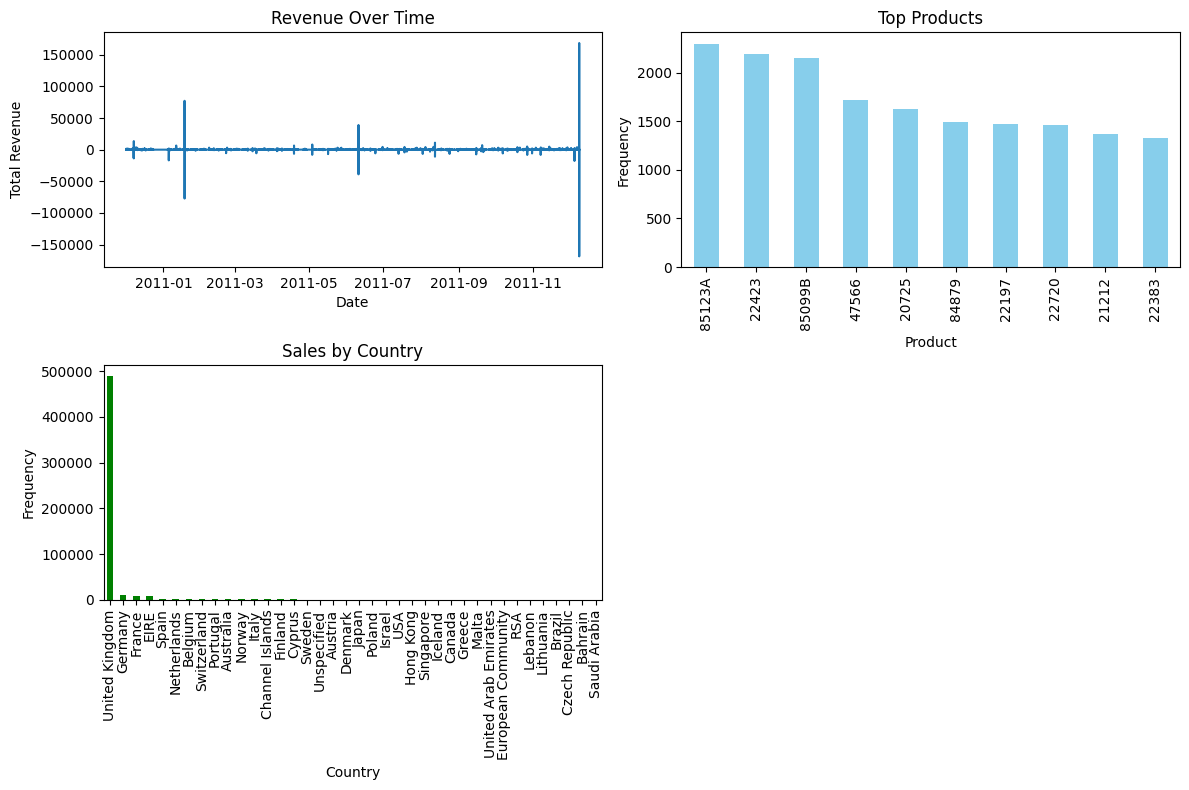

In [65]:
#Addding a new Coloumn
data['Total_Revenue']=data['Quantity']*data['UnitPrice']
# Data Preprocessing (Calculate total revenue, extract datetime features, etc.)

# Create individual visualizations
plt.figure(figsize=(12, 8))

# Revenue Over Time
plt.subplot(2, 2, 1)
plt.plot(data['InvoiceDate'], data['Total_Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')

# Top Products
plt.subplot(2, 2, 2)
top_products = data['StockCode'].value_counts().head(10)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top Products')
plt.xlabel('Product')
plt.ylabel('Frequency')

# Sales by Country
plt.subplot(2, 2, 3)
sales_by_country = data['Country'].value_counts()
sales_by_country.plot(kind='bar', color='green')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**10.Customer Lifetime Value: Create a box plot showing the distribution of
customer lifetime values.**

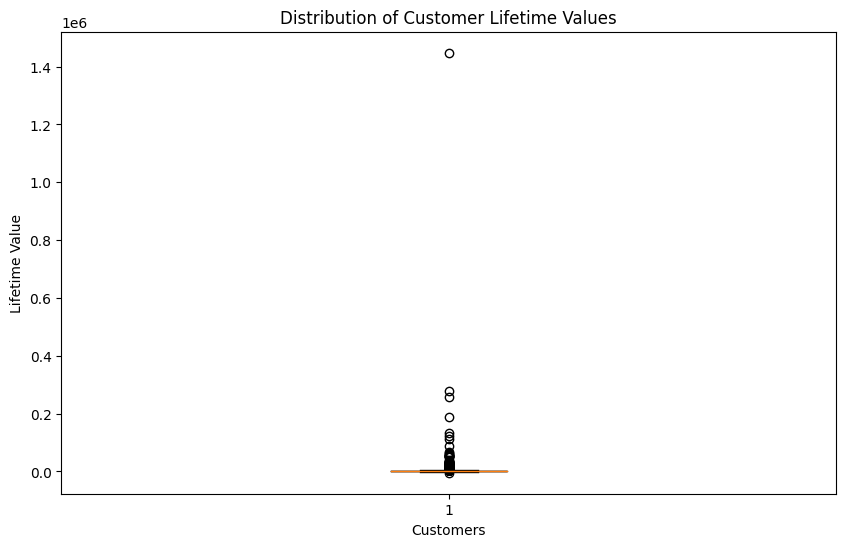

In [66]:
# Calculate total revenue for each customer
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
customer_lifetime_value = data.groupby('CustomerID')['TotalRevenue'].sum()

# Plot the box plot for customer lifetime values
plt.figure(figsize=(10, 6))
plt.boxplot(customer_lifetime_value)
plt.title('Distribution of Customer Lifetime Values')
plt.xlabel('Customers')
plt.ylabel('Lifetime Value')
plt.show()

**11.Show correlation matrix.**

File not found. Please provide the correct file path.


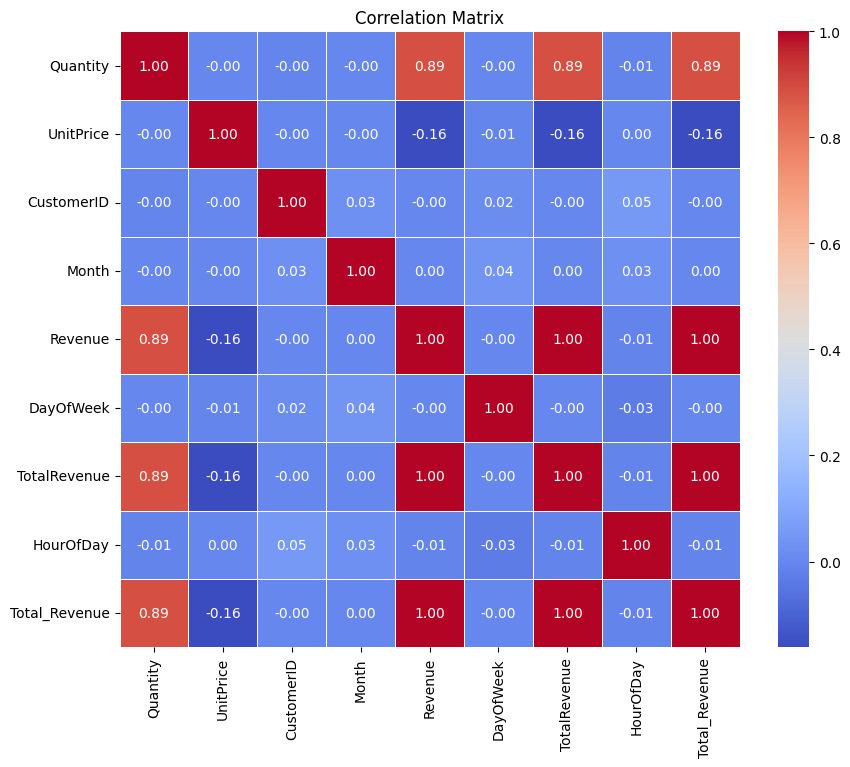

In [69]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
try:
    data = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check for missing values
if data.isnull().values.any():
    print("Dataset contains missing values. Please handle them before proceeding.")
    exit()

# Check data types
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
if len(numeric_columns) == 0:
    print("No numeric columns found in the dataset. Please ensure the dataset contains numeric data.")
    exit()

# Calculate correlation matrix
corr_matrix = data[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()